In [8]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Gurukannan/testcsv/master/Vehicle%20Density%20Dataset.csv')
data.head()

,date,temperature,humidity,windspeed,vehicle density(per km of the Indian Road)
0,1-May-18,18.232871,45.697702,17.034578,82.000000
1,1-Jun-18,18.491299,50.237349,10.091568,88.000000
2,1-Aug-18,18.117948,48.851252,17.035029,112.333333
3,1-Sep-18,18.600111,48.557576,18.331855,76.666667
4,1-Nov-18,18.549363,59.623460,12.414597,43.000000


In [9]:
data['date'] = data['date'].apply(pd.to_datetime)
data['year'] = [i.year for i in data['date']]
data['month'] = [i.month_name()[0:3] for i in data['date']]
data['day'] = [i.day_name()[0:3] for i in data['date']]

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

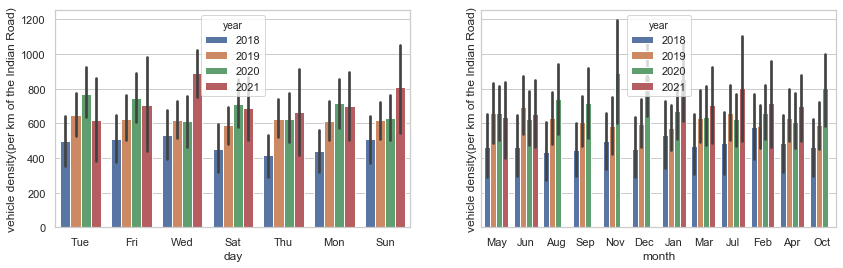

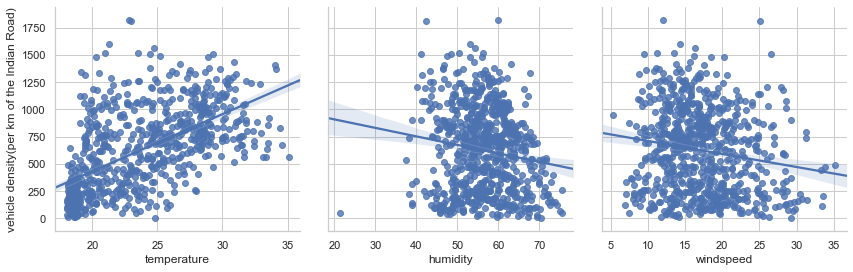

In [34]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4), sharey=True)
bp1 = sns.barplot(data=data, x='day', y='vehicle density(per km of the Indian Road)', hue='year', ax=ax1)
bp2 = sns.barplot(data=data, x='month', y='vehicle density(per km of the Indian Road)', hue='year', ax=ax2)
pp = sns.pairplot(data=data,
y_vars=['vehicle density(per km of the Indian Road)'],
x_vars=['temperature', 'humidity', 'windspeed'],
kind='reg',
height=4)

In [32]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
x = data[['temperature', 'humidity', 'windspeed']]
y = data['vehicle density(per km of the Indian Road)']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1,
              silent=None, subsample=1, verbosity=1)

In [36]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error

R^2 score: 0.12
MAE score: 280.20
EVS score: 0.14


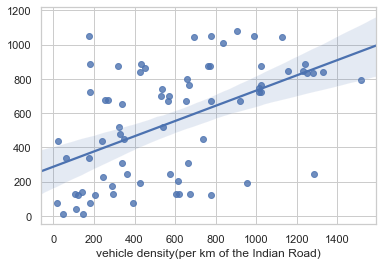

In [37]:
predictions = classifier.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=y_test, y=predictions)

In [39]:
import pickle
with open('bike_model_xgboost.pkl', 'wb') as file:
    pickle.dump(classifier, file)